$\color{brown}{\text{HCIN 620 Lab 6 Course Project}}$

In this project we are tasked with predicting the stages of Chronic Kidney Disease based on Glomerular Filtration Rate (GFR).  Information for dataset is available in this link 
http://archive.ics.uci.edu/ml//datasets/Chronic_Kidney_Disease 

In order to succeed in this final you will be required to input most of the python code. Please review all the previous labs before you begin, and read the instructions carefully. 

Rather than using a question/answer format, we have commented the code cells with the notation **#TODO** This is a placeholder technique (a To Do list, so to speak) commonly used in machine learning.  Complete each #TODO task requested of you.

*$\text{Good Luck!}$*



Notebook by Reza Afra, Ph.D. and Barbara Berkovich, Ph.D., M.A.

Last update December 28, 2020 

#Step 1: Environment Setup

You have learned that in order to setup an environment for your project, you'd need to first import the libraries you need. 

In [ ]:
#TODO 1. Import the libraries all the libraries. 







#TODO 2. Add a print command to acknowledge completion of the import.

In [1]:
#ANSWER KEY TODO 1. Import the libraries all the libraries
#Extra libraries are okay, and they only need to have the minimum to complete 
#this project without errors.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

 # Suppress pesky warnings
import warnings
warnings.filterwarnings("ignore")

#ANSWER KEY TODO 2. Add a print command to acknowledge completion of the import.

print('Import complete')

Import complete


# Step 2: Data Cleaning

Upload the data file called data-lab-6-ckd-courseproject.csv data.

Read the csv file into a data frame, and use the name of the dataframe to print the first and last 5 rows.

In [ ]:
#TODO 3. Load the data into a pandas dataframe



#TODO 4. Use the name of the dataframe to print the first and last five rows.

In [3]:
#ANSWER KEY TODO 3. Load the data into a pandas dataframe

df = pd.read_csv('data-lab-6-ckd-courseproject.csv')
data = df.copy()

#ANSWER KEY TODO 4. Use the name of the dataframe to print the first and last five rows.

data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,0
154,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,0
155,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,0
156,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,0


The data is located at 'https://drive.google.com/file/d/19oQaKN4NQiGa6Tq9P18Zk3ImbKgzIw9m/view?usp=sharing' . In the following cell, connect to the data and print a statement that indicates you've successfully completed this step. 

In [ ]:
# Load the data into a pandas dataframe

#url =  'https://drive.google.com/file/d/19oQaKN4NQiGa6Tq9P18Zk3ImbKgzIw9m/view?usp=sharing'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df = pd.read_csv(path)
#data = df.copy() 
#print('Data connection complete')

Data connection complete


Add more data cleaning...

#Step 3: Exploratory Data Analysis (EDA) and Preprocessing

Next we're going to build the targets which are stages of CKD in a column we will call "CKD Stages" There are various equations for calculating GFR but here we will stick with a simplified form of it. Please read about GFR in the following link. Source: https://www.niddk.nih.gov/health-information/professionals/clinical-tools-patient-management/kidney-disease/laboratory-evaluation/glomerular-filtration-rate/estimating

In [4]:
# Used a formula given by NIDDK which was simpler and made it even simpler by
# removing the effect of race and gender
# GFR (mL/min/1.73 m^2) = 175 × (Scr)^-1.154 × (Age)-0.203 

# DO NOT change the code below
def calc_gfr(Scr, Age):
  return (175 * (Scr) ** -1.154) * (Age ** -0.203) 

# I tried 6 stages but the dataset is too small so classes 4 and 5 
# had no instances. I reduced the number of classes to 3. 
def calc_ckd_stage(gfr):
  bins = [0, 45, 90, 250]
  labels = [3, 2, 1]
  ret = pd.cut(gfr, bins=bins, labels=labels)
  return ret

In [5]:
# DO NOT change the code below
data["GFR"] = calculate_GFR(data["Serum Creatinine"], data["Age"])
gfr = data['GFR']
removed_outliers = gfr.between(gfr.quantile(.00), gfr.quantile(.95))

data = data[removed_outliers]

NameError: ignored

In [ ]:
# DO NOT change the code below
data["CKD Stages"] =calc_ckd_stage(data["GFR"])

KeyError: ignored

In [ ]:
# DO NOT change the code below
data["CKD Stages"].value_counts()

KeyError: ignored

##Histogram


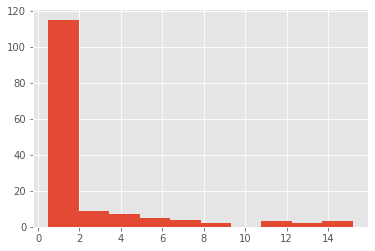

In [ ]:
# TODO: Print a histogram of the values of "Serum Creatinine"
data["Serum Creatinine"].hist();

##Scatterplot

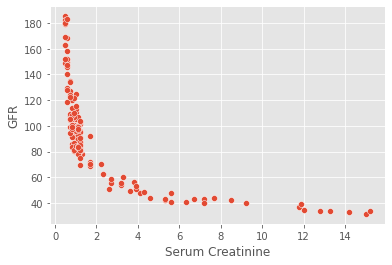

In [ ]:
# TODO: Print a scatterplot of the values of "GFR" vs "Serum Creatinine"
sns.scatterplot(data["Serum Creatinine"], data["GFR"]);

##Isolate features from target

In [ ]:
# TO DO: Isolate features and targets 

X = data.drop(['Class', 'CKD Stages'], axis=1)
y = data["CKD Stages"]

There are various ways to encode categorical data. You learned about some of them during labs. Visit this [link](https://www.datacamp.com/community/tutorials/categorical-data) and read it thoroughly. Find an appropriate encoding scheme and transform the categorical attributes of your dataset.  

In [ ]:
# TO DO: Isolate the categorical features and encode them using a proper encoding method. 
# TO DO: Isolate the numverical features and scale them using a proper scaling method. 

In [ ]:
numerical_ix = X.select_dtypes(include=['float64']).columns
categorical_ix = X.select_dtypes(include=['object']).columns

#define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
transform = ColumnTransformer(transformers=t)

X = transform.fit_transform(X)

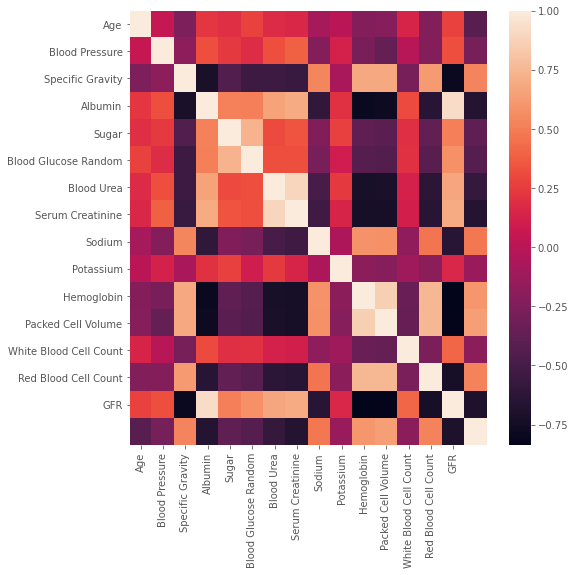

In [ ]:
#TO DO: Print a heatmap of correlation between features
plt.figure(figsize=(8, 8))
 
sns.heatmap(data.corr(), cbar=True, annot=False, yticklabels=numerical_ix,
            xticklabels=numerical_ix);

##Split the Data

In [ ]:
# TODO: Split the data to train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['CKD Stages'], random_state=308)

#Step 4: Build the Models and Evaluate


##Logistic Regression

In [ ]:
# Use Logistic Regression to predict the stage of the kidney function 
# and print the accuracies of your model on both train and test data
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')
print(f' \nAccuracy on train set: {accuracy_score(y_train, log_reg.predict(X_train)):.3f}')

 Accuracy on test set: 0.947
 
Accuracy on train set: 0.982


###Confusion Matrix

In [ ]:
# TODO: Plot a Confusion Matrix based on your findings from the previous step

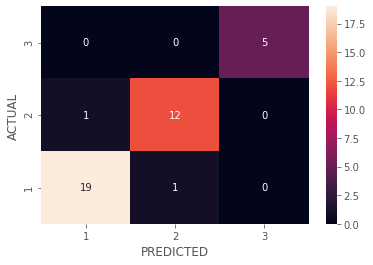

In [ ]:
# TODO: Plot a Confusion Matrix based on your findings from the previous step

data_ = {'y_true':    y_test,
        'y_pred': y_pred
        }

df = pd.DataFrame(data_, columns=['y_true','y_pred'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_pred'], rownames=['ACTUAL'], colnames=['PREDICTED'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

##K-nearest Neighbors

In [ ]:

# TO DO: Use Logistic Regression to predict the stage of the kidney function 
# and print the accuracies of your model on both train and test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

 Accuracy on test set: 0.868


In [ ]:
# TO DO: Find the optimal number of neighbors and print the accuracies 
# on both test and train data for that number of neighbors. 
accuracies = []
for N in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
accuracies = np.array(accuracies) # convert to numpy array
sns.lineplot(np.arange(1,20),accuracies);
# Find the best k
best_k = 1 + np.argmax(accuracies) # add one b/c arrays are 0-indexed
best_accuracy = np.max(accuracies)
print(f"Best k: {best_k}  \nBest Accuracy from kNN: {best_accuracy:.3f}")

If your code runs cleanly all the way through, then print as a pdf and submit to Blackboard Module 6 for grading.